In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.metrics import r2_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier


In [8]:
data = pd.read_csv('Dataset/data.csv')
#data.isnull().sum()
#data.info()
#data.head()

Before Bankrupt?
0    4942
1     172
Name: count, dtype: int64
After: Bankrupt?
0    4942
1    4942
Name: count, dtype: int64

Accuracy of test data = 0.960


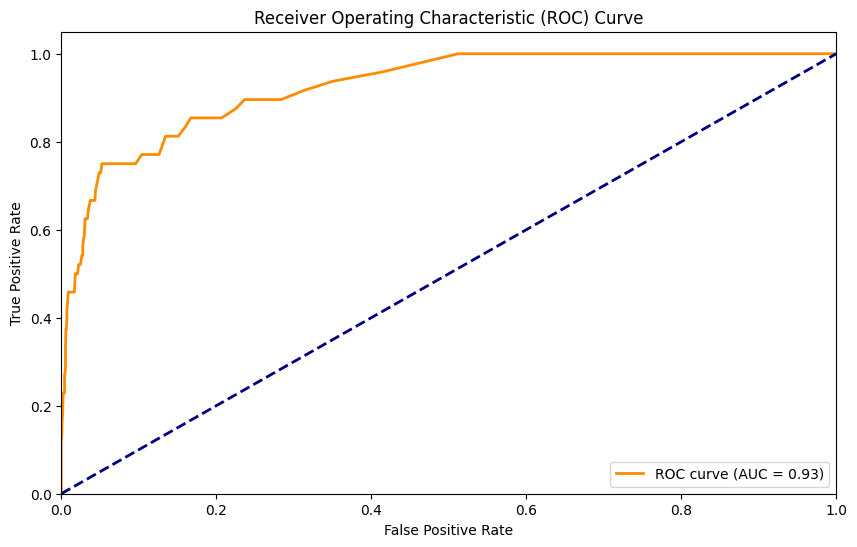

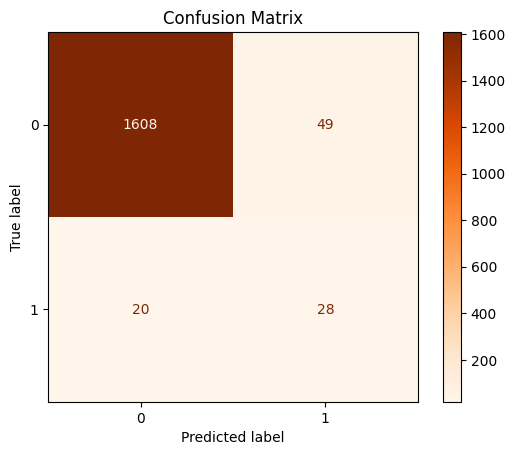

AUC Score: 0.925
F1 Score: 0.448
Bankrupt?
0    6599
1     220
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1657
           1       0.36      0.58      0.45        48

    accuracy                           0.96      1705
   macro avg       0.68      0.78      0.71      1705
weighted avg       0.97      0.96      0.96      1705



In [ ]:
x = data.drop(columns= ['Bankrupt?']) 
y = data['Bankrupt?']
x_train, x_test, y_train, y_test = train_test_split(x, y)

print('Before', y_train.value_counts())

smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

print('After:', y_train.value_counts())

scaler= StandardScaler() # to standardize the data with mean 0 and standard deviation 1

x_train_scaled = scaler.fit_transform(x_train) #fit_tranform, fit is to calculate the sd and mean of data. while transform is to calculate the z-scores using the mean and sd
x_test_scaled = scaler.transform(x_test) # as we alr have s and mean from train data, we just need to use the same sd and mean in our test data, to avoid bias


model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can tune n_estimators and other parameters

model.fit(x_train_scaled, y_train) #ask the model to learn the pattern from training data, so that it can perform well on predicting the X_test_scaled to get something similar to Y_test(actual value)

y_pred = model.predict(x_test_scaled) # ask the model to predict x_test_scaled

acc = (y_pred == y_test).mean() #find the accuracy of model by comparing the prediction of model, and the actual value of y(y_test). as this is binary whether it is 0 or 1, we can using mean, sum all number and divide it with number of sample, to get the accuracy
print('\nAccuracy of test data = {:.3f}'.format(acc))

y_pred_proba = model.predict_proba(x_test_scaled)[:, 1] 

fpr, tpr, _ = roc_curve(y_test, y_pred_proba) #actual vs predicted
roc_auc = auc(fpr, tpr) #area under curve, it's in this order (fpr,tpr) bcs fpr is on x axis and tpr is on y axis. it 's a standard order

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # plot a line with x value from 0 to 1, and y value from 0 to 1 so we can see how well the model perform. as here only have two option whether bankrupt or not, then we have prpability 0.5 for each option. so we set is as default
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(y_test, y_pred) # create a matrix to count how many true positive, true negative, false postive, false negative 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_) # display the matrix, by using matrix value created before, and display it by looking the unique classes in the data after it being trained
disp.plot(cmap=plt.cm.Oranges) #colour map 
plt.title('Confusion Matrix')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f'AUC Score: {roc_auc:.3f}')
print(f'F1 Score: {f1:.3f}')



print("\nClassification Report:")
print(classification_report(y_test, y_pred))